In [ ]:
# EDA TO UNDERSTAND DATASET
# EDA TO ALSO SELECT MODELS BASED ON DATA

In [1]:
!unzip /content/Rice_Image_Dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55

In [4]:
import os
import glob
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

# Define the dataset path
dataset_path = Path('/content/Rice_Image_Dataset')

# verify the path exists and list classes
if dataset_path.exists():
    classes = [x.name for x in dataset_path.iterdir() if x.is_dir()]
    print(f"Classes found: {classes}")

# Load file paths and labels into a DataFrame
image_paths = []
labels = []

for class_name in classes:
    class_dir = dataset_path / class_name
    for img_path in class_dir.glob('*.*'):
        image_paths.append(str(img_path))
        labels.append(class_name)

df = pd.DataFrame({
    'filepath': image_paths,
    'label': labels
})

print(f"Total images loaded: {len(df)}")
df.head()

Classes found: ['Ipsala', 'Arborio', 'Jasmine', 'Basmati', 'Karacadag']
Total images loaded: 75000


,filepath,label
0,/content/Rice_Image_Dataset/Ipsala/Ipsala (521...,Ipsala
1,/content/Rice_Image_Dataset/Ipsala/Ipsala (136...,Ipsala
2,/content/Rice_Image_Dataset/Ipsala/Ipsala (326...,Ipsala
3,/content/Rice_Image_Dataset/Ipsala/Ipsala (869...,Ipsala
4,/content/Rice_Image_Dataset/Ipsala/Ipsala (583...,Ipsala


label
Ipsala       15000
Arborio      15000
Jasmine      15000
Basmati      15000
Karacadag    15000
Name: count, dtype: int64


/tmp/ipython-input-2782898742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


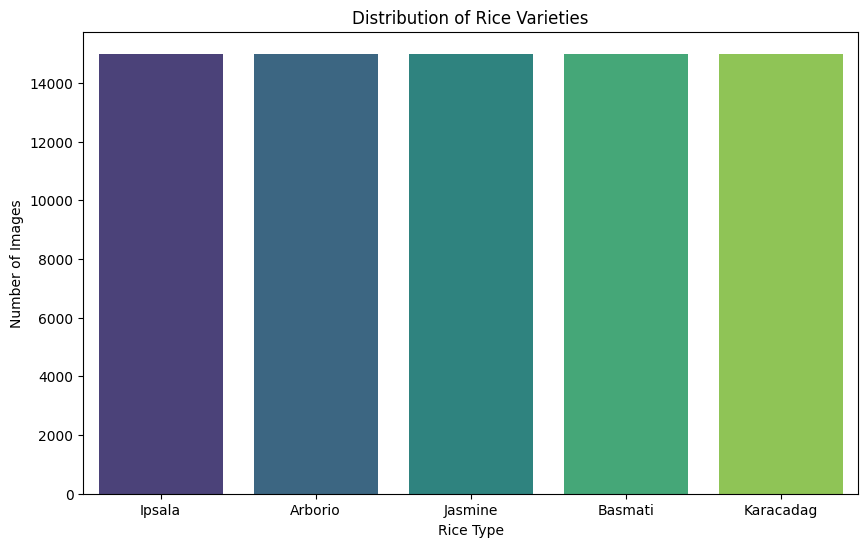

In [5]:
# Check count of images per class
label_counts = df['label'].value_counts()
print(label_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Rice Varieties')
plt.xlabel('Rice Type')
plt.ylabel('Number of Images')
plt.show()

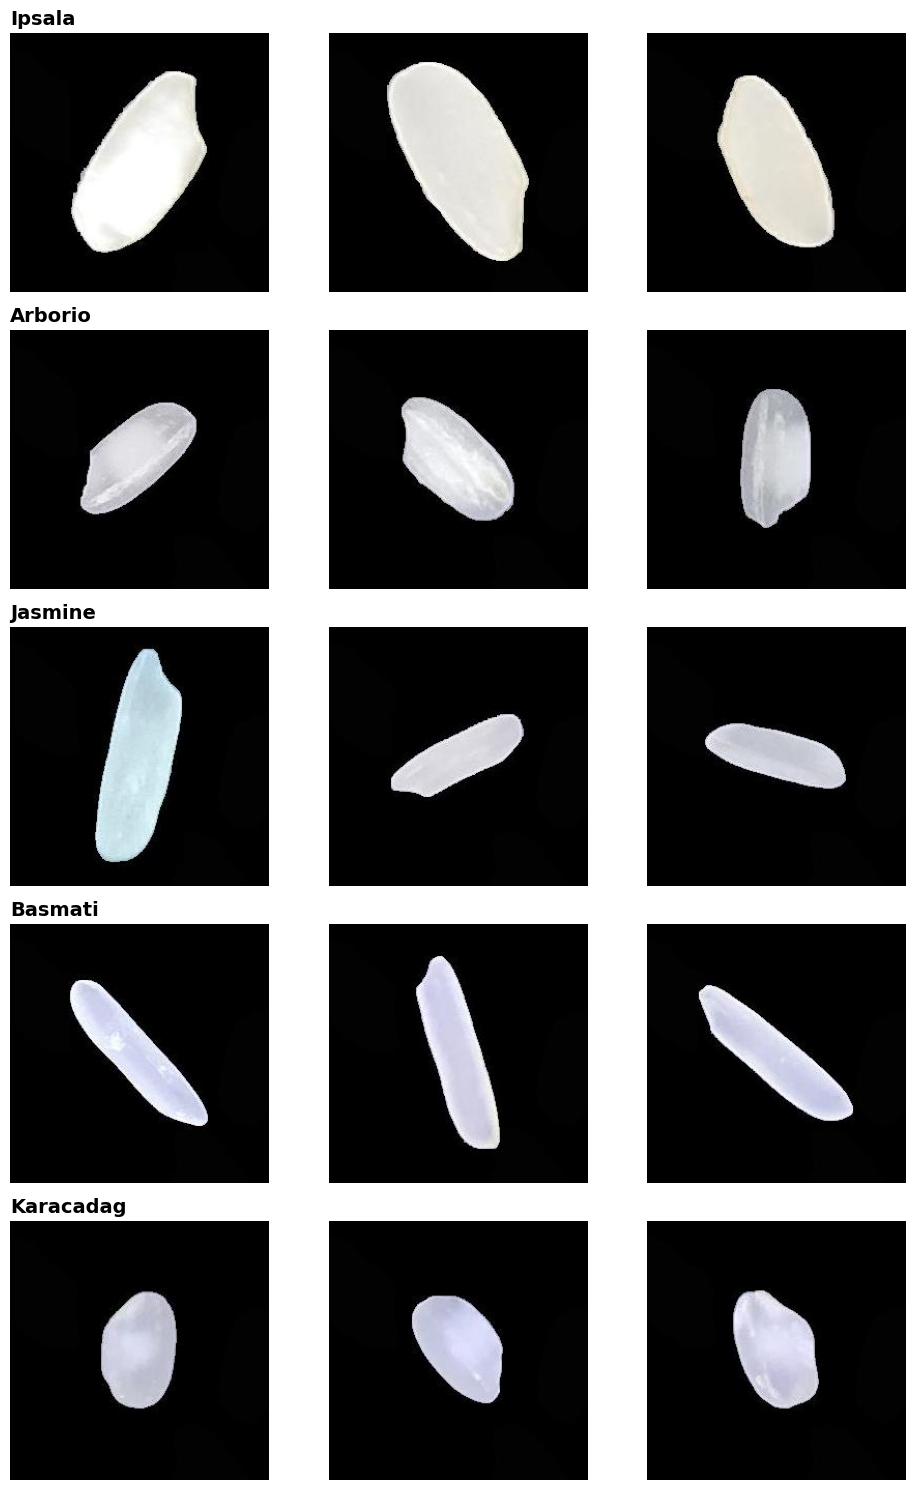

In [6]:
# Visualize the samples
def visualize_samples(df, num_samples=3):
    unique_labels = df['label'].unique()

    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(10, 15))

    for i, label in enumerate(unique_labels):
        sample_df = df[df['label'] == label].sample(num_samples)
        for j, (_, row) in enumerate(sample_df.iterrows()):
            img = Image.open(row['filepath'])
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(label, fontsize=14, fontweight='bold', loc='left')

    plt.tight_layout()
    plt.show()

visualize_samples(df)

In [7]:
# Check dimensions of a random samples
sample_size = 500
sample_df = df.sample(sample_size, random_state=42)

widths = []
heights = []
channels = []

for img_path in sample_df['filepath']:
    img = cv2.imread(img_path)
    h, w, c = img.shape
    widths.append(w)
    heights.append(h)
    channels.append(c)

print(f"Dimension Analysis (Sample of {sample_size})")
print(f"Unique Widths: {set(widths)}")
print(f"Unique Heights: {set(heights)}")
print(f"Unique Channels: {set(channels)}")
print(f"All images in sample are: {widths[0]}x{heights[0]} with {channels[0]} channels.")

Dimension Analysis (Sample of 500)
Unique Widths: {250}
Unique Heights: {250}
Unique Channels: {3}
All images in sample are: 250x250 with 3 channels.


/tmp/ipython-input-1915001403.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='mean_intensity', data=sample_df, palette='viridis')


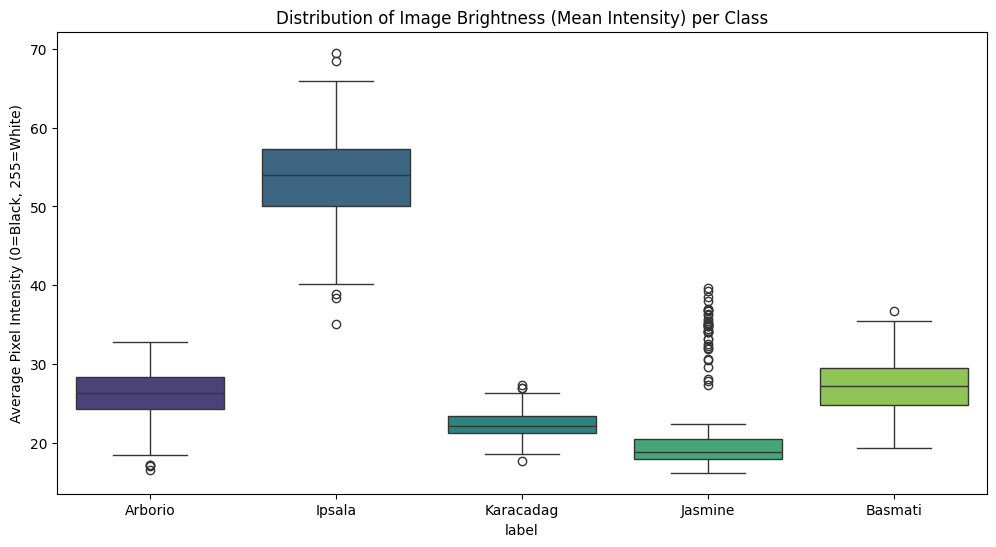

In [11]:
# Pixel Intensity of all classes
def get_mean_intensity(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img.mean()

sample_df = df.sample(1000, random_state=42)
sample_df['mean_intensity'] = sample_df['filepath'].apply(get_mean_intensity)

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='mean_intensity', data=sample_df, palette='viridis')
plt.title('Distribution of Image Brightness (Mean Intensity) per Class')
plt.ylabel('Average Pixel Intensity (0=Black, 255=White)')
plt.show()

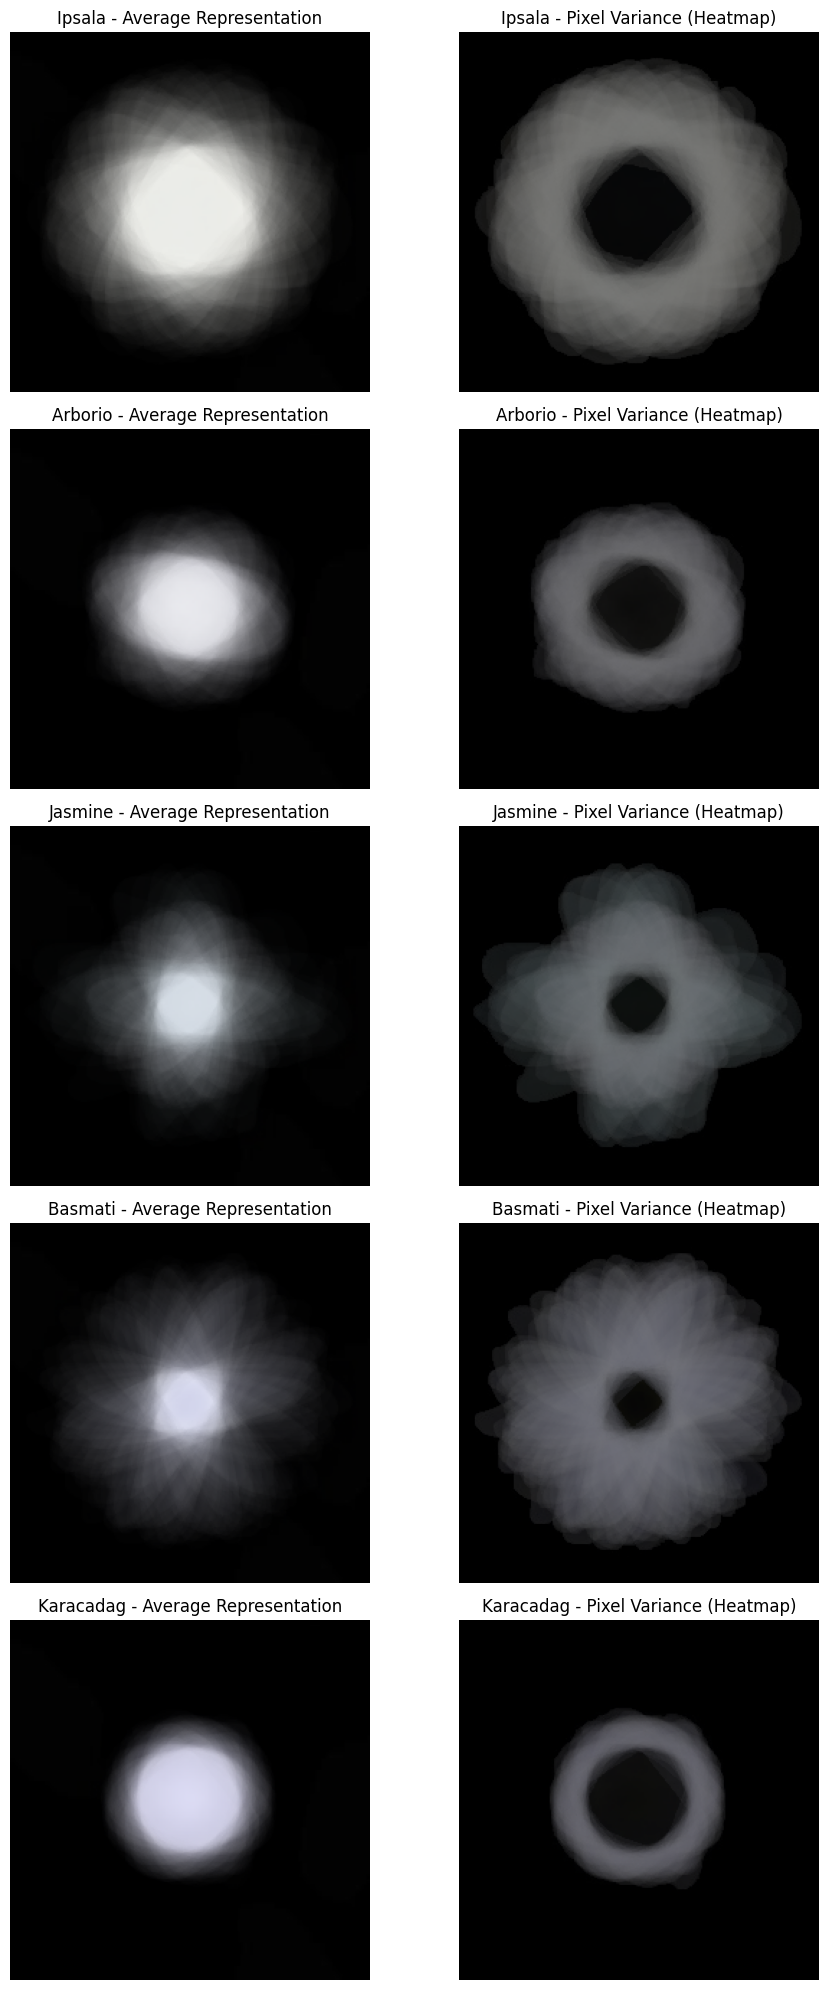

In [10]:
# Variance of all classes
def visualize_class_variance(class_name, df, num_images=100):
    class_paths = df[df['label'] == class_name]['filepath'].sample(num_images, random_state=42).values

    images = []
    target_size = (250, 250)

    for path in class_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        images.append(img)

    images = np.array(images)

    # Calculate Mean and Standard Deviation
    mean_img = np.mean(images, axis=0).astype(np.uint8)
    std_img = np.std(images, axis=0).astype(np.uint8)

    return mean_img, std_img

# Visualize for all classes
classes = df['label'].unique()
fig, axes = plt.subplots(len(classes), 2, figsize=(10, 20))

for i, class_name in enumerate(classes):
    mean_img, std_img = visualize_class_variance(class_name, df)

    # Plot Mean Image
    axes[i, 0].imshow(mean_img)
    axes[i, 0].set_title(f'{class_name} - Average Representation')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(std_img, cmap='inferno')
    axes[i, 1].set_title(f'{class_name} - Pixel Variance (Heatmap)')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# FINDINGS:
# 1. DATASET IS CLEAN
# 2. VERY LOW OUTLIERS
# 3. MEAN OF EACH CLASSES IS CENTERED AND THE VARIANCE IS ALSO NOT VERY WIDE
# 4. BOXPLOT GIVES US INFORMATION ABOUT THE SEPARATION BETWEEN CLASSES

In [18]:
# NEXT STEPS:
# 1. FROM THIS, WE CAN SAY THAT THE DATASET DOESNT REQUIRE A COMPLEX MODEL TO TRAIN
# 2. CAN USE EFFICIENT MODELS WITH LESSER WIDTH WHICH ARE EASIER TO QUANTIZE TOO
# 3. STUDENT MODEL : MOBILENET-V3-SMALL-WIDTH-0.25X
# 4. CAN DO KNOWLEDGE DISTILLATION TO MAKE UP FOR THE LOSS DURING QUANTIZATION (QAT). CHOOSE WIDE TEACHERS FOR MORE GENERALIZED LOGITS
# 5. TEACHER MODEL : MOBILENETV2, DENSENET121, RESNET18